In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier


In [2]:
df=pd.read_csv("C:\\Users\\dobil\\OneDrive\\Desktop\\MACHINE-LEARNING\\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape


(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

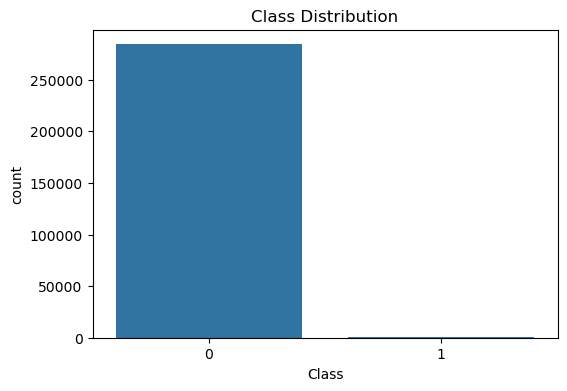

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(x='Class',data=df)
plt.title('Class Distribution') 
plt.show()

In [6]:
x=df.drop('Class',axis=1)
y=df['Class']


In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
s=StandardScaler()
x_train_scaled=s.fit_transform(x_train)
x_test_scaled=s.transform(x_test)
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=4)

rf.fit(x_train_scaled,y_train)


RandomForestClassifier(criterion='entropy', max_depth=4, n_estimators=10)

In [15]:
dtc=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dtc.fit(x_train_scaled,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [17]:
y_pred1=rf.predict(x_test)
y_pred2=dtc.predict(x_test)
print("Random Forest Classifier Accuracy:\n",accuracy_score(y_test,y_pred1))
print("Decision Tree Classifier Accuracy:\n",accuracy_score(y_test,y_pred2))
print("Random Forest Classifier Confusion Matrix:\n",confusion_matrix(y_test,y_pred1))
print("Decision Tree Classifier Confusion Matrix:\n",confusion_matrix(y_test,y_pred2))



Random Forest Classifier Accuracy:
 0.9993153330290369
Decision Tree Classifier Accuracy:
 0.999420666409185
Random Forest Classifier Confusion Matrix:
 [[56853    10]
 [   29    70]]
Decision Tree Classifier Confusion Matrix:
 [[56852    11]
 [   22    77]]


c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\dobil\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Text(0.5, 1.0, 'Random Forest Classifier Confusion Matrix')

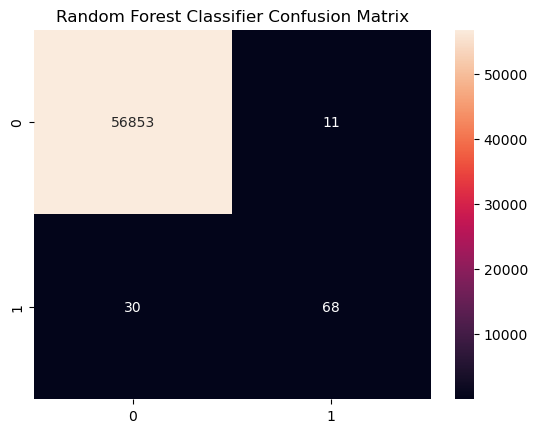

In [14]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='d')
plt.title('Random Forest Classifier Confusion Matrix')

Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

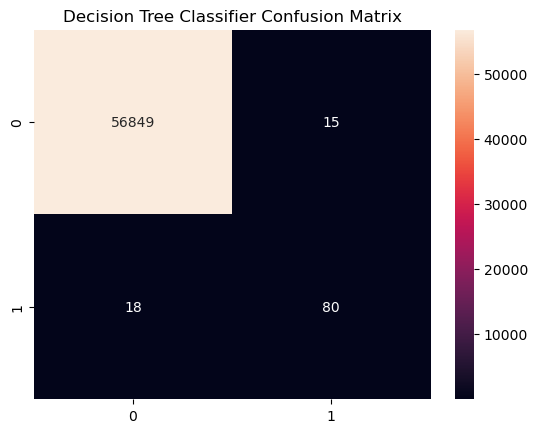

In [13]:

sns.heatmap(confusion_matrix(y_test,y_pred2),annot=True,fmt='d')
plt.title('Decision Tree Classifier Confusion Matrix')